TypeError: 'float' object cannot be interpreted as an integer

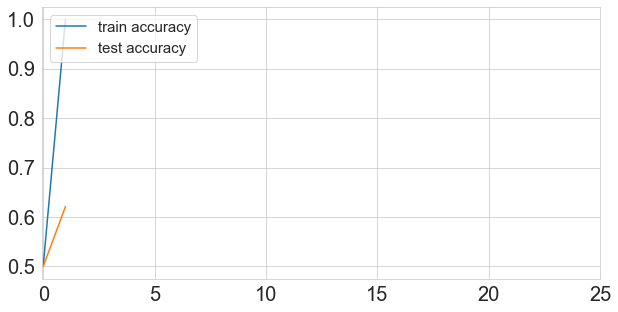

In [4]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
import pandas as pd
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
df = pd.read_csv("winequality-red.csv")
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
    ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )
    # append accuracies
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()